In [9]:
from pathlib import Path 
from astropy.io import fits
import numpy as np
import scipy as sp
import scipy.interpolate as interp
import matplotlib.pyplot as plt

psf_P8R3_ULTRACLEANVETO_V2_PSF.fits
Filename: ../paper2/paper2_data/Fermi_files/psf_P8R3_ULTRACLEANVETO_V2_PSF.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   ()      
  1  RPSF_PSF0     1 BinTableHDU     79   1R x 10C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E]   
  2  PSF_SCALING_PARAMS_PSF0    1 BinTableHDU     39   1R x 1C   [3E]   
  3  FISHEYE_CORRECTION_PSF0    1 BinTableHDU     67   1R x 7C   [46E, 46E, 16E, 16E, 736E, 736E, 736E]   
  4  RPSF_PSF1     1 BinTableHDU     79   1R x 10C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E]   
  5  PSF_SCALING_PARAMS_PSF1    1 BinTableHDU     39   1R x 1C   [3E]   
  6  FISHEYE_CORRECTION_PSF1    1 BinTableHDU     67   1R x 7C   [46E, 46E, 16E, 16E, 736E, 736E, 736E]   
  7  RPSF_PSF2     1 BinTableHDU     79   1R x 10C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E]   
  8  PSF_SCALING_PARAMS_PSF2    1 BinTableHDU     39   1R x 1C   [3E]   
  9  

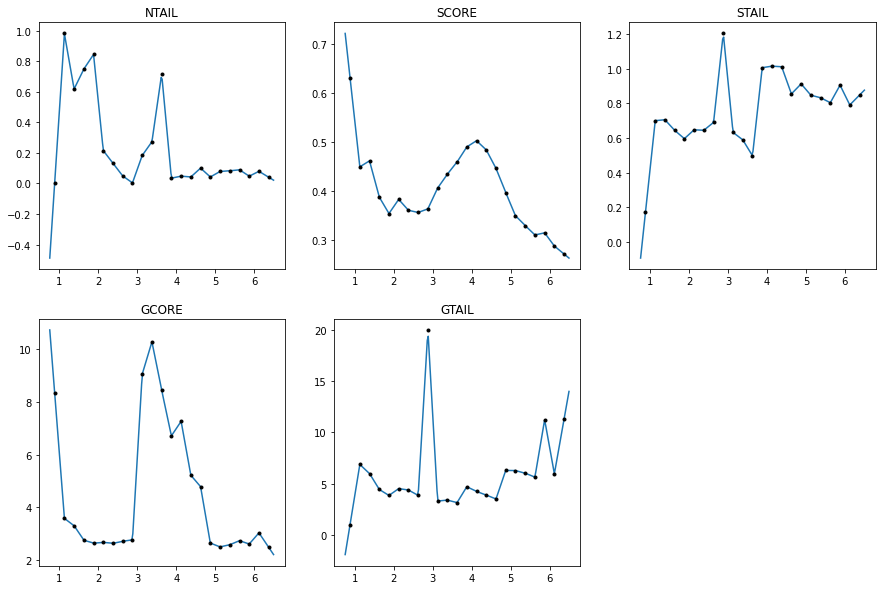

In [10]:
#Energy dependent Fermi PSF parameters assuming normal incidence
file = '../paper2/paper2_data/Fermi_files/psf_P8R3_ULTRACLEANVETO_V2_PSF.fits'
event_type = 'PSF3'
scale_hdu = 'PSF_SCALING_PARAMS_' + event_type
fit_hdu = 'RPSF_' + event_type
hdul = fits.open(file)
hdul.info()
print('\n\n', hdul[fit_hdu].header)
C = hdul[scale_hdu].data[0][0][:-1]
beta = -hdul[scale_hdu].data[0][0][2]
print('\n\n', 'Scale Parameters (C_0, C_1, beta) = ', (C[0], C[1], beta))
fit_e = np.linspace(0.875, 6.375, 23)
NTAIL_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][5][7], fill_value = 'extrapolate')
SCORE_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][6][7], fill_value = 'extrapolate')
STAIL_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][7][7], fill_value = 'extrapolate')
GCORE_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][8][7], fill_value = 'extrapolate')
GTAIL_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][9][7], fill_value = 'extrapolate')
fig, ax = plt.subplots(2,3, figsize = (15,10))
plot_e = np.linspace(0.75, 6.5, 230)
ax[0,0].plot(plot_e, NTAIL_func(plot_e))
ax[0,0].plot(fit_e, hdul[fit_hdu].data[0][5][7], 'k.')
ax[0,0].set_title('NTAIL')
ax[0,1].plot(plot_e, SCORE_func(plot_e))
ax[0,1].plot(fit_e, hdul[fit_hdu].data[0][6][7], 'k.')
ax[0,1].set_title('SCORE')
ax[0,2].plot(plot_e, STAIL_func(plot_e))
ax[0,2].plot(fit_e, hdul[fit_hdu].data[0][7][7], 'k.')
ax[0,2].set_title('STAIL')
ax[1,0].plot(plot_e, GCORE_func(plot_e))
ax[1,0].plot(fit_e, hdul[fit_hdu].data[0][8][7], 'k.')
ax[1,0].set_title('GCORE')
ax[1,1].plot(plot_e, GTAIL_func(plot_e))
ax[1,1].plot(fit_e, hdul[fit_hdu].data[0][9][7], 'k.')
ax[1,1].set_title('GTAIL')
ax[1,2].remove()
fig.show()
hdul.close()

norm =  0.9942139732374646


Text(0.5, 0, 'log10(scaled deviation)')

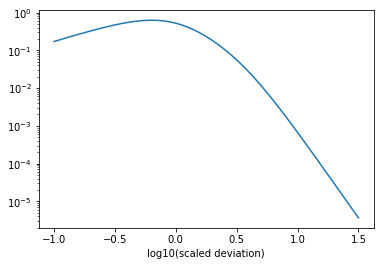

In [3]:
#Recreated plot from https://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_LAT_IRFs/IRF_PSF.html
NTAIL = 0.08639
SCORE = 0.5399
STAIL = 1.063
GCORE = 2.651
GTAIL = 2.932
FCORE = 1/(1 + NTAIL*STAIL**2/SCORE**2)
x_vals = 10**np.linspace(-1, 1.5, 1000)
kingCORE = (1/(2*np.pi*SCORE**2))*(1-(1/GCORE))*(1+(1/(2*GCORE))*(x_vals**2/SCORE**2))**(-GCORE)
kingTAIL = (1/(2*np.pi*STAIL**2))*(1-(1/GTAIL))*(1+(1/(2*GTAIL))*(x_vals**2/STAIL**2))**(-GTAIL)
PSF = FCORE*kingCORE + (1-FCORE)*kingTAIL
print('norm = ', np.sum(2*np.pi*x_vals[:-1]*PSF[:-1]*(x_vals[1:]-x_vals[:-1])))
fig, ax = plt.subplots()
ax.plot(np.log10(x_vals), 2*np.pi*x_vals*PSF)
ax.set_yscale('log')
ax.set_xlabel('log10(scaled deviation)')

Filename: ../paper2/paper2_data/Fermi_files/edisp_P8R3_ULTRACLEANVETO_V2_EDISP.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   ()      
  1  ENERGY DISPERSION_EDISP0    1 BinTableHDU     91   1R x 13C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E, 184E, 184E, 184E]   
  2  EDISP_SCALING_PARAMS_EDISP0    1 BinTableHDU     39   1R x 1C   [6E]   
  3  ENERGY DISPERSION_EDISP1    1 BinTableHDU     91   1R x 13C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E, 184E, 184E, 184E]   
  4  EDISP_SCALING_PARAMS_EDISP1    1 BinTableHDU     39   1R x 1C   [6E]   
  5  ENERGY DISPERSION_EDISP2    1 BinTableHDU     91   1R x 13C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E, 184E, 184E, 184E]   
  6  EDISP_SCALING_PARAMS_EDISP2    1 BinTableHDU     39   1R x 1C   [6E]   
  7  ENERGY DISPERSION_EDISP3    1 BinTableHDU     91   1R x 13C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E, 184E, 184E, 184E]   


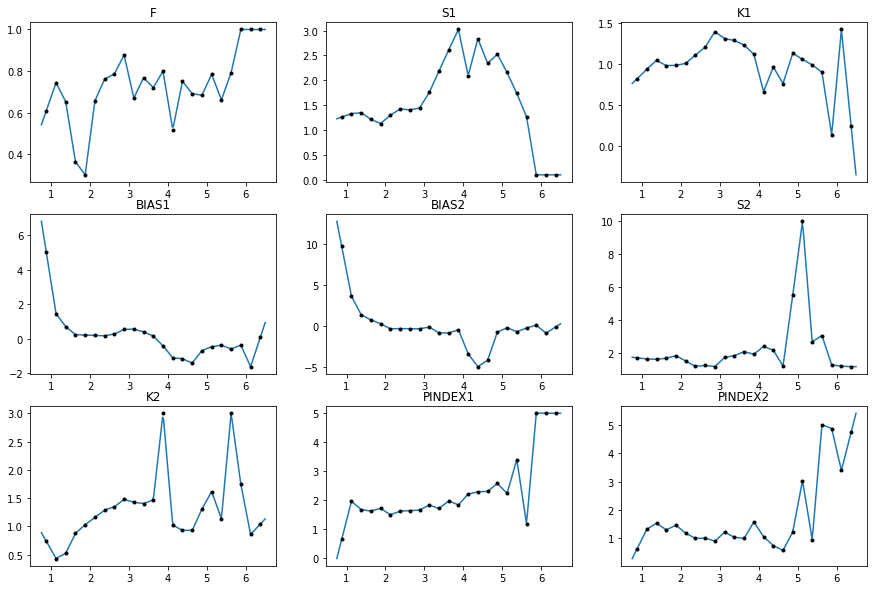

In [4]:
#Fermi energy dispersion parameters assuming normal incidence
file = '../paper2/paper2_data/Fermi_files/edisp_P8R3_ULTRACLEANVETO_V2_EDISP.fits'
event_type = 'EDISP3'
scale_hdu = 'EDISP_SCALING_PARAMS_' + event_type
fit_hdu = 'ENERGY DISPERSION_' + event_type
hdul = fits.open(file)
hdul.info()
print('\n\n', hdul[fit_hdu].header)
C = hdul[scale_hdu].data[0][0]
print('\n\n', 'Scale Parameters (C_0, C_1, C_2, C_3, C_4, C_5) = ', (C[0], C[1], C[2], C[3], C[4], C[5]))
fit_e = np.linspace(0.875, 6.375, 23)
F_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][4][7], fill_value = 'extrapolate')
S1_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][5][7], fill_value = 'extrapolate')
K1_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][6][7], fill_value = 'extrapolate')
BIAS1_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][7][7], fill_value = 'extrapolate')
BIAS2_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][8][7], fill_value = 'extrapolate')
S2_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][9][7], fill_value = 'extrapolate')
K2_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][10][7], fill_value = 'extrapolate')
PINDEX1_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][11][7], fill_value = 'extrapolate')
PINDEX2_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][12][7], fill_value = 'extrapolate')
fig, ax = plt.subplots(3,3, figsize = (15,10))
plot_e = np.linspace(0.75, 6.5, 230)
ax[0,0].plot(plot_e, F_func(plot_e))
ax[0,0].plot(fit_e, hdul[fit_hdu].data[0][4][7], 'k.')
ax[0,0].set_title('F')
ax[0,1].plot(plot_e, S1_func(plot_e))
ax[0,1].plot(fit_e, hdul[fit_hdu].data[0][5][7], 'k.')
ax[0,1].set_title('S1')
ax[0,2].plot(plot_e, K1_func(plot_e))
ax[0,2].plot(fit_e, hdul[fit_hdu].data[0][6][7], 'k.')
ax[0,2].set_title('K1')
ax[1,0].plot(plot_e, BIAS1_func(plot_e))
ax[1,0].plot(fit_e, hdul[fit_hdu].data[0][7][7], 'k.')
ax[1,0].set_title('BIAS1')
ax[1,1].plot(plot_e, BIAS2_func(plot_e))
ax[1,1].plot(fit_e, hdul[fit_hdu].data[0][8][7], 'k.')
ax[1,1].set_title('BIAS2')
ax[1,2].plot(plot_e, S2_func(plot_e))
ax[1,2].plot(fit_e, hdul[fit_hdu].data[0][9][7], 'k.')
ax[1,2].set_title('S2')
ax[2,0].plot(plot_e, K2_func(plot_e))
ax[2,0].plot(fit_e, hdul[fit_hdu].data[0][10][7], 'k.')
ax[2,0].set_title('K2')
ax[2,1].plot(plot_e, PINDEX1_func(plot_e))
ax[2,1].plot(fit_e, hdul[fit_hdu].data[0][11][7], 'k.')
ax[2,1].set_title('PINDEX1')
ax[2,2].plot(plot_e, PINDEX2_func(plot_e))
ax[2,2].plot(fit_e, hdul[fit_hdu].data[0][12][7], 'k.')
ax[2,2].set_title('PINDEX2')
fig.show()
hdul.close()

norm =  0.9999573362322759


Text(0.5, 0, 'scaled deviation')

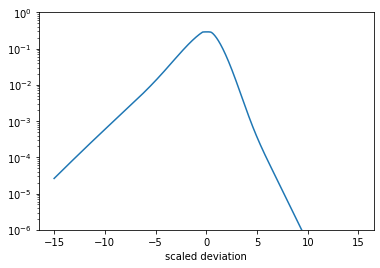

In [5]:
#Recreated plot from https://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_LAT_IRFs/IRF_E_dispersion.html
F = 0.6664
S1 = 1.532
K1 = 1.318
BIAS1 = 0.4456
BIAS2 = -0.357
S2 = 1.586
K2 = 1.419
PINDEX1 = 1.538
PINDEX2 = 1.129
x_vals = np.linspace(-15, 15, 1000)
x_low1, x_high1 = np.where(x_vals < BIAS1), np.where(x_vals >= BIAS1)
x_low2, x_high2 = np.where(x_vals < BIAS2), np.where(x_vals >= BIAS2)
g1, g2 = np.ones(1000), np.ones(1000)
prefac1 = PINDEX1/(S1*sp.special.gamma(1/PINDEX1))*K1/(1+K1**2)
prefac2 = PINDEX2/(S2*sp.special.gamma(1/PINDEX2))*K2/(1+K2**2)
g1[x_low1] = prefac1*np.exp(-(1/(K1*S1)*np.abs(x_vals[x_low1]-BIAS1))**PINDEX1)
g2[x_low2] = prefac2*np.exp(-(1/(K2*S2)*np.abs(x_vals[x_low2]-BIAS2))**PINDEX2)
g1[x_high1] = prefac1*np.exp(-(K1/S1*np.abs(x_vals[x_high1]-BIAS1))**PINDEX1)
g2[x_high2] = prefac2*np.exp(-(K2/S2*np.abs(x_vals[x_high2]-BIAS2))**PINDEX2)
D = F*g1 + (1-F)*g2
#D *= 0.3
print('norm = ', np.sum(D[:-1]*(x_vals[1:]-x_vals[:-1])))
fig, ax = plt.subplots()
ax.plot(x_vals, D)
ax.set_yscale('log')
ax.set_ylim((1e-6,1))
ax.set_xlabel('scaled deviation')

norm =  0.9982795362911917


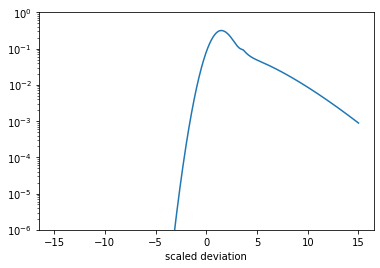

In [8]:
hdul = fits.open(file)
index = 1
F = hdul[fit_hdu].data[0][4][7][index]
S1 = hdul[fit_hdu].data[0][5][7][index]
K1 = hdul[fit_hdu].data[0][6][7][index]
BIAS1 = hdul[fit_hdu].data[0][7][7][index]
BIAS2 = hdul[fit_hdu].data[0][8][7][index]
S2 = hdul[fit_hdu].data[0][9][7][index]
K2 = hdul[fit_hdu].data[0][10][7][index]
PINDEX1 = hdul[fit_hdu].data[0][11][7][index]
PINDEX2 = hdul[fit_hdu].data[0][12][7][index]
x_vals = np.linspace(-15, 15, 1000)
x_low1, x_high1 = np.where(x_vals < BIAS1), np.where(x_vals >= BIAS1)
x_low2, x_high2 = np.where(x_vals < BIAS2), np.where(x_vals >= BIAS2)
g1, g2 = np.ones(1000), np.ones(1000)
prefac1 = PINDEX1/(S1*sp.special.gamma(1/PINDEX1))*K1/(1+K1**2)
prefac2 = PINDEX2/(S2*sp.special.gamma(1/PINDEX2))*K2/(1+K2**2)
g1[x_low1] = prefac1*np.exp(-(1/(K1*S1)*np.abs(x_vals[x_low1]-BIAS1))**PINDEX1)
g2[x_low2] = prefac2*np.exp(-(1/(K2*S2)*np.abs(x_vals[x_low2]-BIAS2))**PINDEX2)
g1[x_high1] = prefac1*np.exp(-(K1/S1*np.abs(x_vals[x_high1]-BIAS1))**PINDEX1)
g2[x_high2] = prefac2*np.exp(-(K2/S2*np.abs(x_vals[x_high2]-BIAS2))**PINDEX2)
D = F*g1 + (1-F)*g2
#D *= 0.3
print('norm = ', np.sum(D[:-1]*(x_vals[1:]-x_vals[:-1])))
fig, ax = plt.subplots()
ax.plot(x_vals, D)
ax.set_yscale('log')
ax.set_ylim((1e-6,1))
ax.set_xlabel('scaled deviation')
hdul.close()